In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json

## Load results

In [ ]:
# load result dataframes
correlation_df = pd.read_csv("./Results/correlations.csv", index_col=0)
independent_MF_df = pd.read_csv("./Results/independent_MF.csv", index_col=0)
interacting_MF_df = pd.read_csv("./Results/interacting_MF.csv", index_col=0)

In [15]:
# load RNA types
biotypes_dict = json.load(open("./Biotypes/biotypes_FIB.json"))

# select mRNA and miNRA names
mRNA_names = [name for name, btype in biotypes_dict.items() if btype == "protein_coding"]
miRNA_names = [name for name, btype in biotypes_dict.items() if btype == "miRNA"]

## Plot setup

In [105]:
# set colours for all plots
plot_colours = {
    "OPTIMAL": "green",
    "INFEASIBLE": "red",
    "CUT_LIMIT": "blue",
    "TIME_LIMIT": "orange",
    "NUMERIC": "black"
}

## (MF ind) Status pie charts

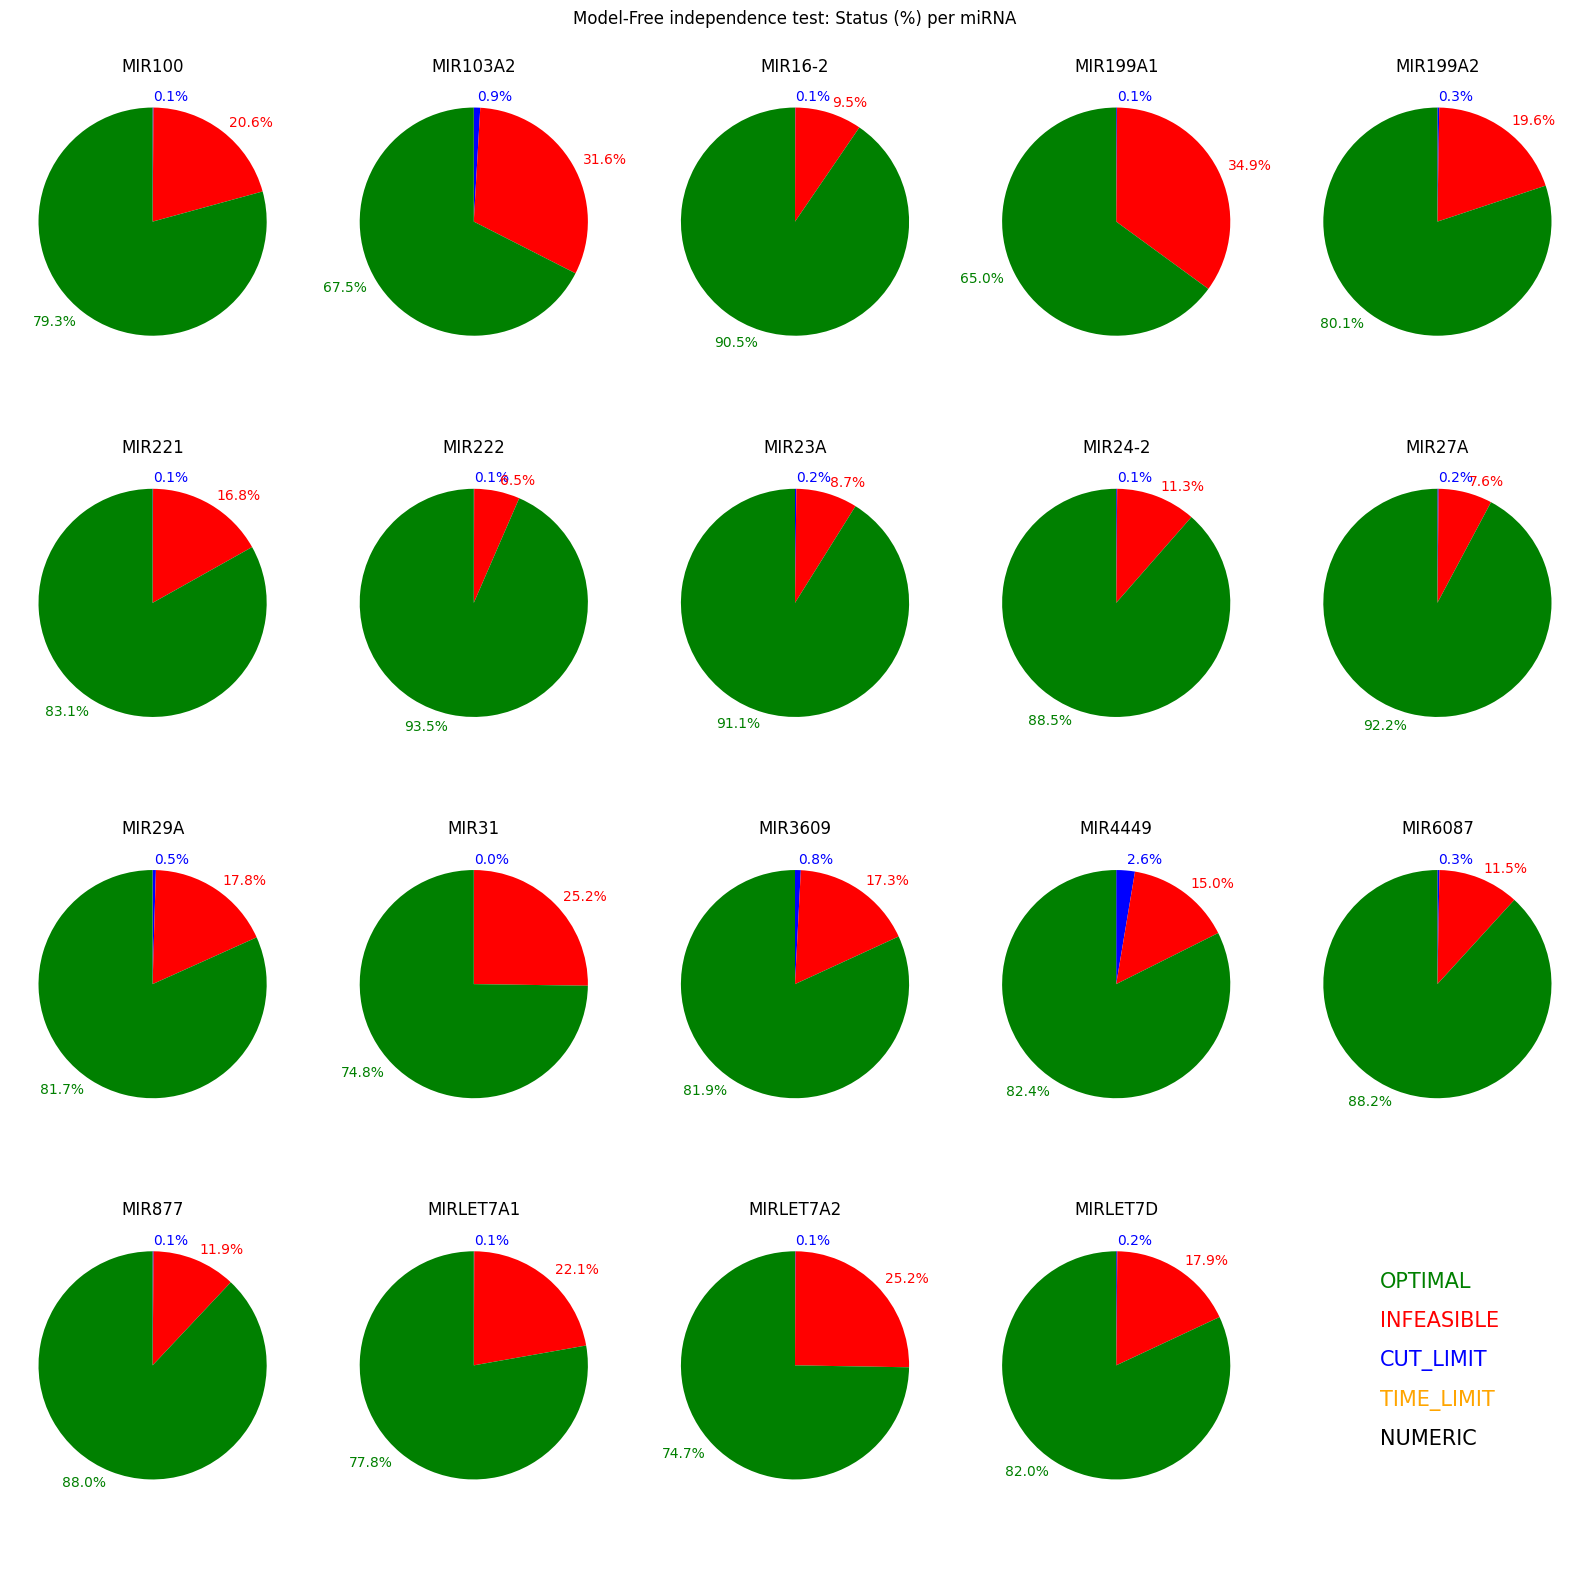

In [121]:
# subplots
m, n = 4, 5
fig, axs = plt.subplots(m, n, figsize=(16, 16))

# for each miRNA
for k, miRNA in enumerate(miRNA_names):
    
    # select subplot
    i = k // n
    j = k % n

    # get data
    status_list = independent_MF_df[f'{miRNA}_d4_c95_status']
    status, counts = np.unique(status_list, return_counts=True)
    colors=[plot_colours[name] for name in status]

    # plot
    wedges, texts = axs[i, j].pie(
        counts,
        labels=[f"{round(100 * count / independent_MF_df.shape[0], 1)}%" for count in counts],
        colors=colors,
        startangle=90,
        counterclock=False,
        rotatelabels=False
    )
    axs[i, j].set_title(miRNA)
    for text, color in zip(texts, colors):
        text.set_color(color)   
        
# text legend
axs[m - 1, n - 1].axis('off')
k = 0
for name, colour in plot_colours.items():
    axs[m - 1, n - 1].text(0.3, 0.7 - k*0.1, name, fontsize=15, color=colour)
    k+=1

# title
plt.suptitle("Model-Free independence test: Status (%) per miRNA")
plt.tight_layout()
plt.show()

## (MF ind) Observed Correlation Histogram by Status

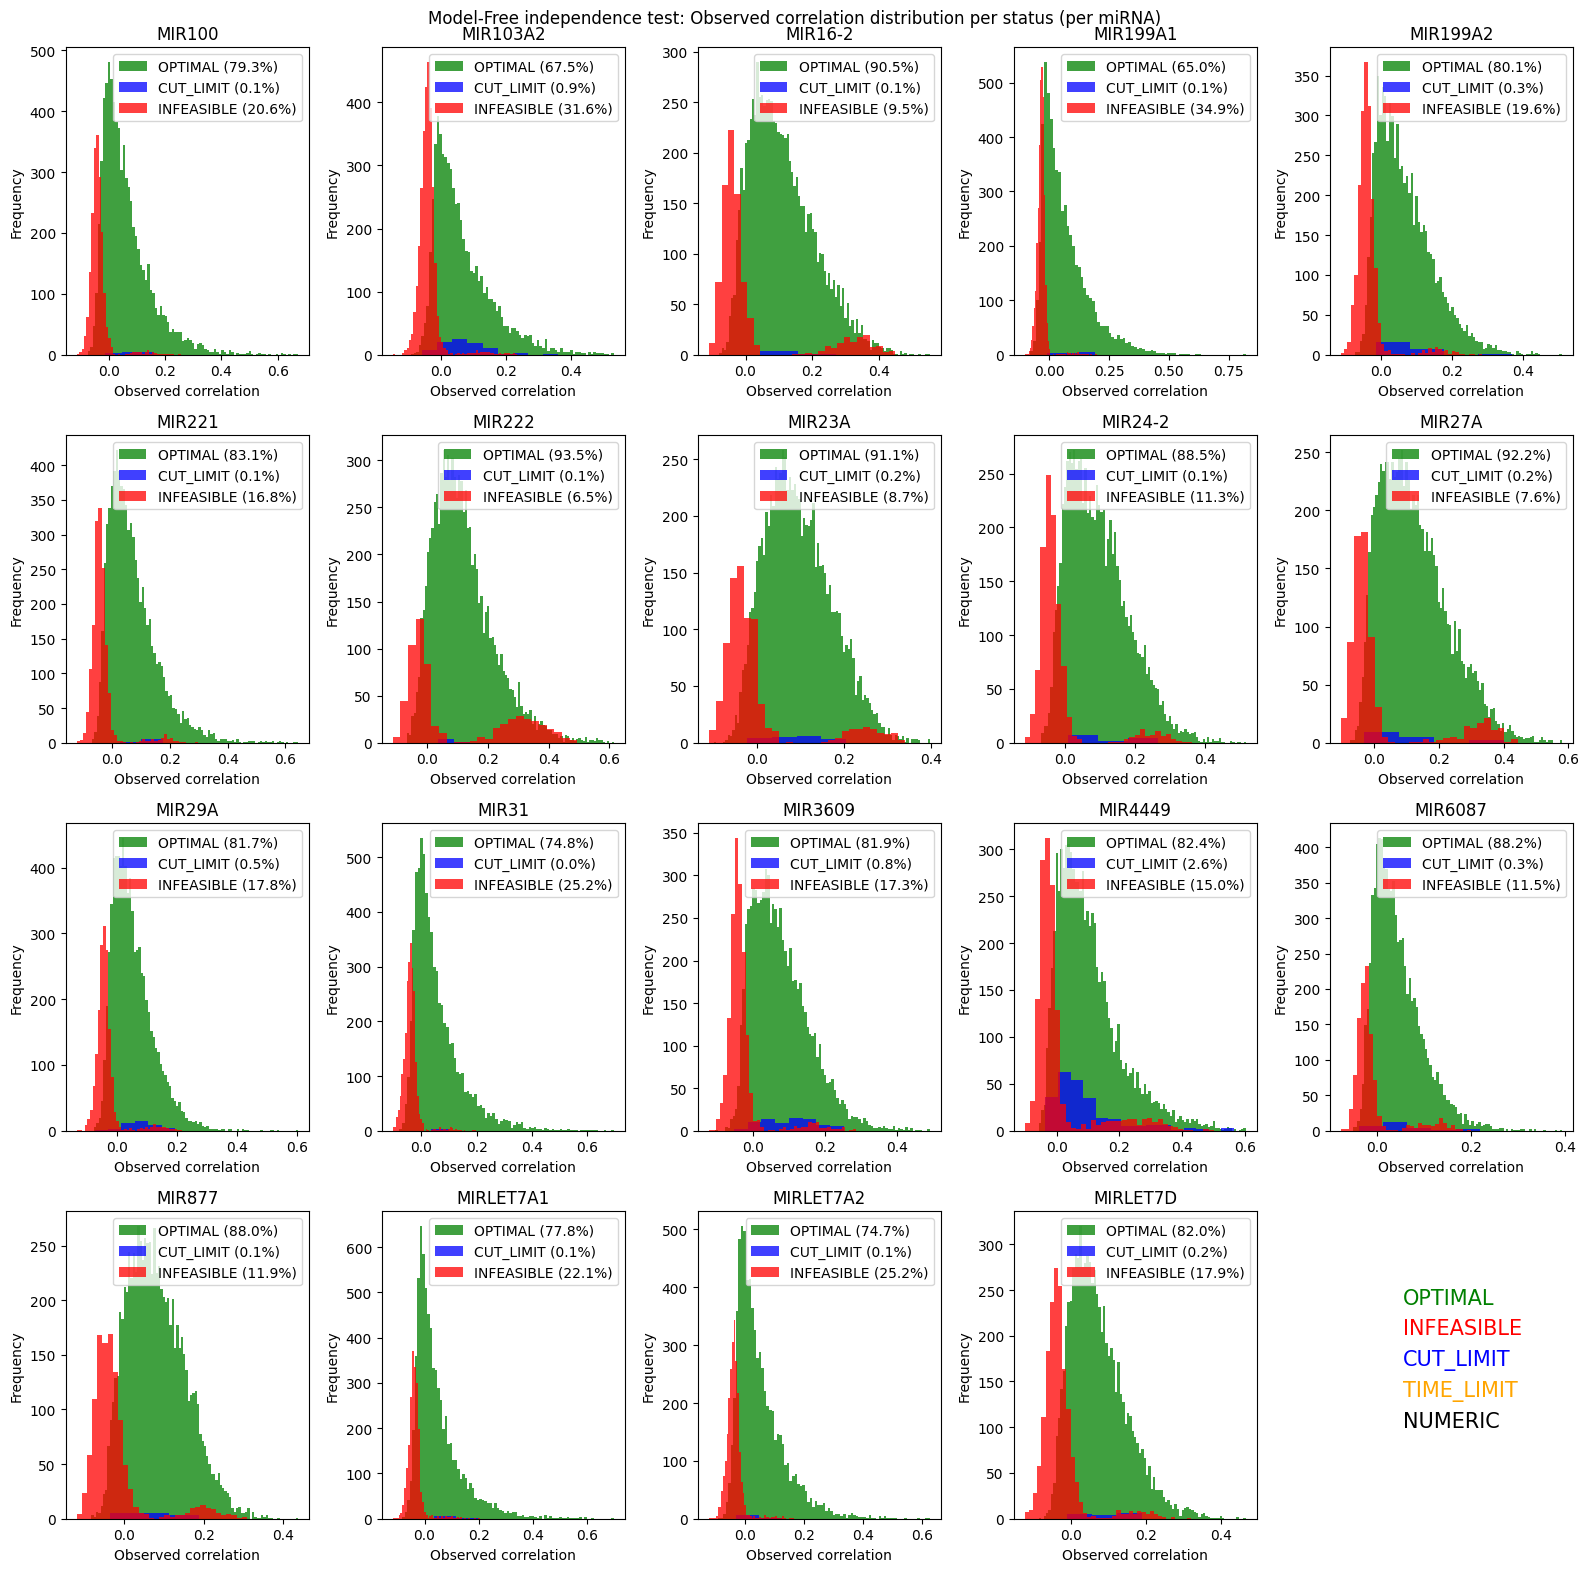

In [122]:
# subplots
m, n = 4, 5
fig, axs = plt.subplots(m, n, figsize=(16, 16))

# for each miRNA
for k, miRNA in enumerate(miRNA_names):
    
    # select subplot
    i = k // n
    j = k % n

    # get data
    correlation = correlation_df[f'{miRNA}_rho']
    status = independent_MF_df[f'{miRNA}_d4_c95_status']
    status_names = np.unique(status)

    # plot
    status_order = ["OPTIMAL", "CUT_LIMIT", "TIME_LIMIT", "NUMERIC", "INFEASIBLE"]
    for name in status_order:
        correlation_status = correlation.loc[status == name]
        L = len(correlation_status)
        if L == 0: continue
        bins = int(np.sqrt(L))
        axs[i, j].hist(
            correlation_status,
            bins=bins,
            alpha=0.75,
            label=f"{name} ({round(100 * len(correlation_status) / interacting_MF_df.shape[0], 1)}%)",
            color=plot_colours[name]
        )
    axs[i, j].set_title(miRNA)
    axs[i, j].set_xlabel("Observed correlation")
    axs[i, j].set_ylabel("Frequency")
    axs[i, j].legend()

# text legend
axs[m - 1, n - 1].axis('off')
k = 0
for name, colour in plot_colours.items():
    axs[m - 1, n - 1].text(0.3, 0.7 - k*0.1, name, fontsize=15, color=colour)
    k+=1

# title
plt.suptitle("Model-Free independence test: Observed correlation distribution per status (per miRNA)")
plt.tight_layout()
plt.show()

## (MF int) Status pie charts

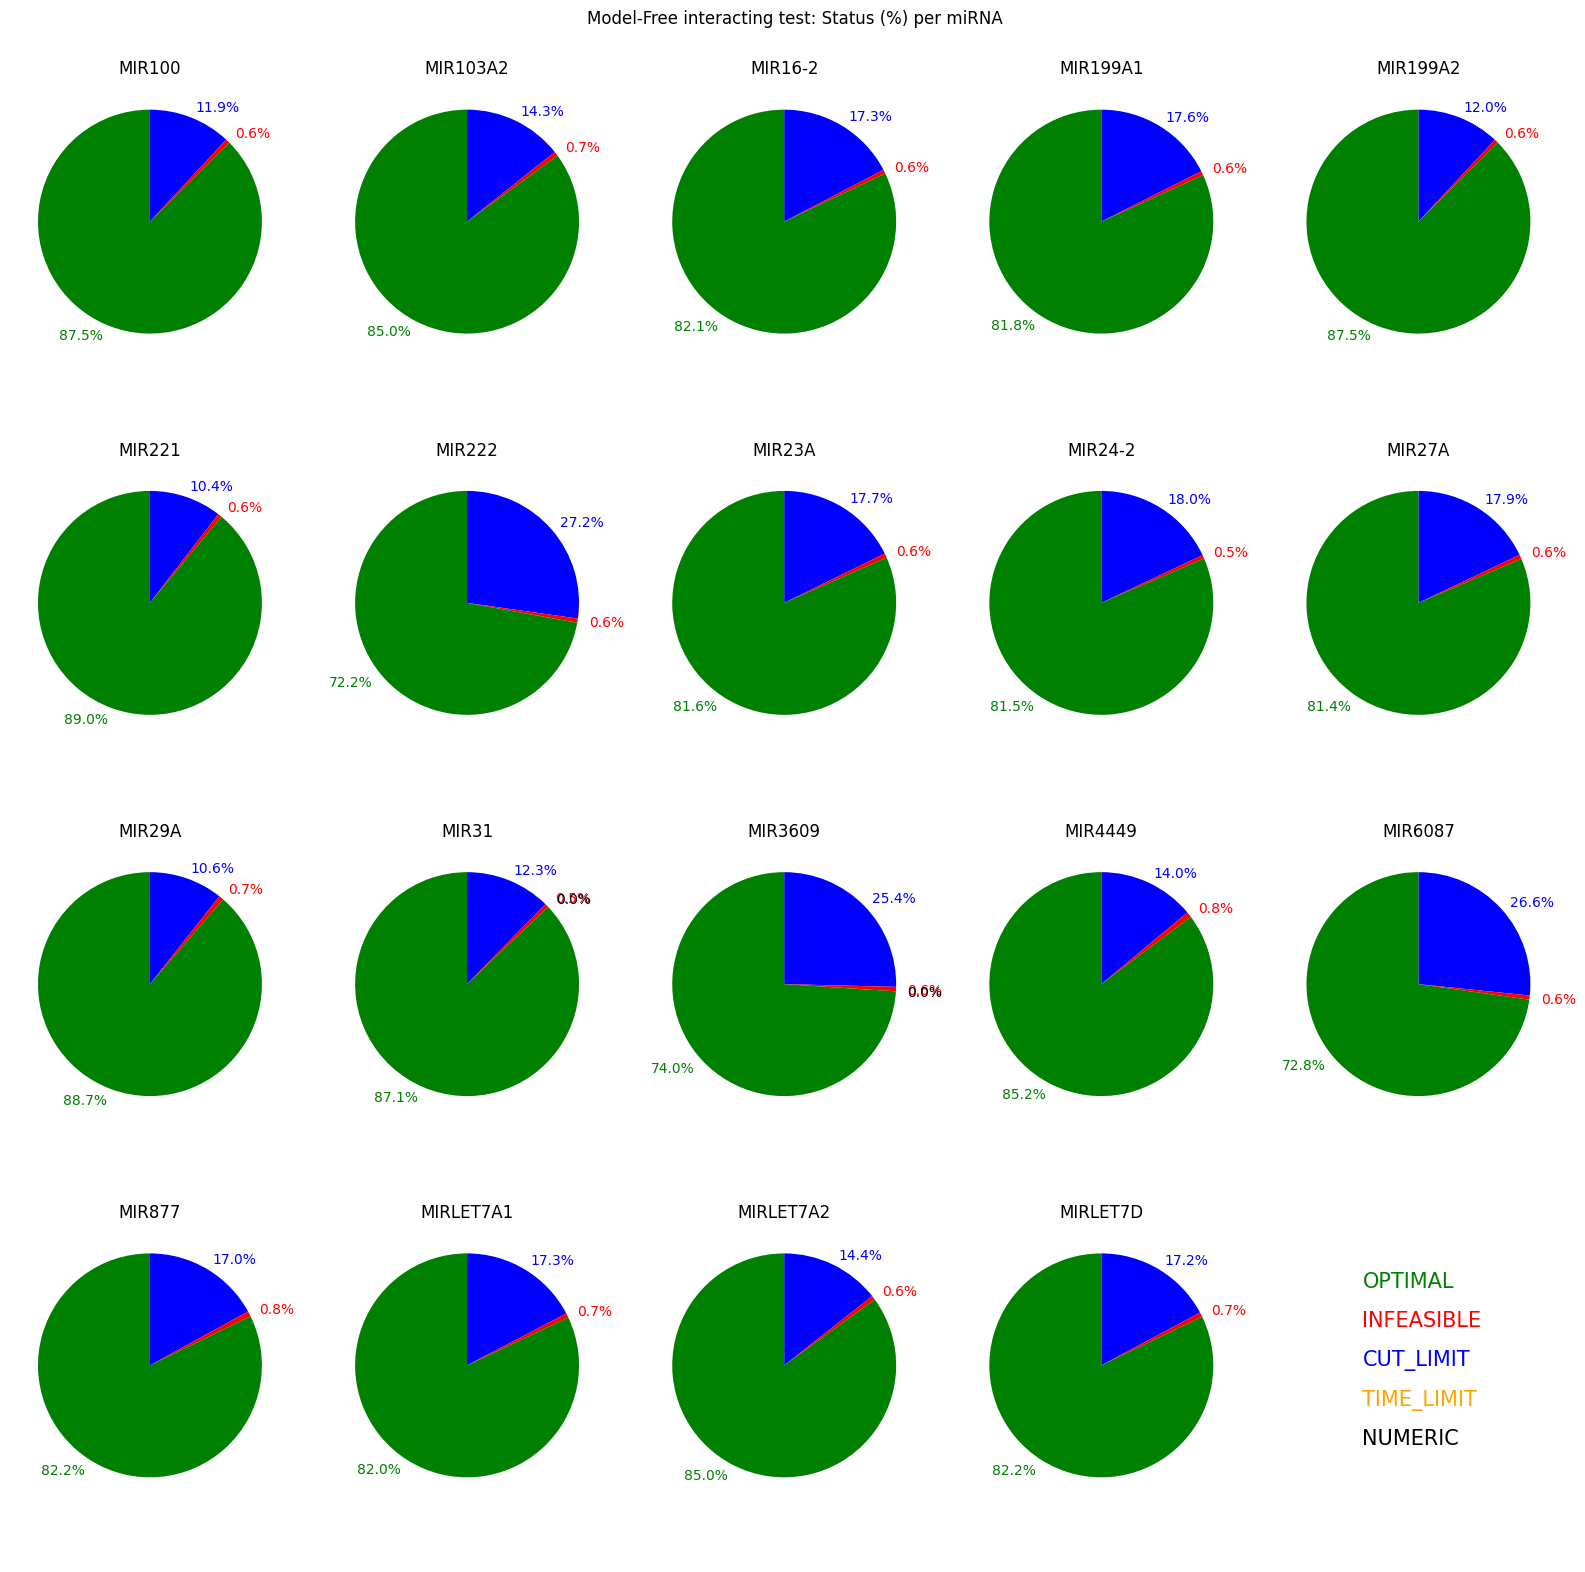

In [123]:
# subplots
m, n = 4, 5
fig, axs = plt.subplots(m, n, figsize=(16, 16))

# for each miRNA
for k, miRNA in enumerate(miRNA_names):
    
    # select subplot
    i = k // n
    j = k % n

    # get data
    status_list = interacting_MF_df[f'{miRNA}_d4_c95_status']
    status, counts = np.unique(status_list, return_counts=True)
    colors=[plot_colours[name] for name in status]

    # plot
    wedges, texts = axs[i, j].pie(
        counts,
        labels=[f"{round(100 * count / interacting_MF_df.shape[0], 1)}%" for count in counts],
        colors=colors,
        startangle=90,
        counterclock=False,
        rotatelabels=False
    )
    axs[i, j].set_title(miRNA)
    for text, color in zip(texts, colors):
        text.set_color(color)   

# text legend
axs[m - 1, n - 1].axis('off')
k = 0
for name, colour in plot_colours.items():
    axs[m - 1, n - 1].text(0.3, 0.7 - k*0.1, name, fontsize=15, color=colour)
    k+=1

# title
plt.suptitle("Model-Free interacting test: Status (%) per miRNA")
plt.tight_layout()
plt.show()

## (MF int) Scatter of Recovered vs Observed Correlations

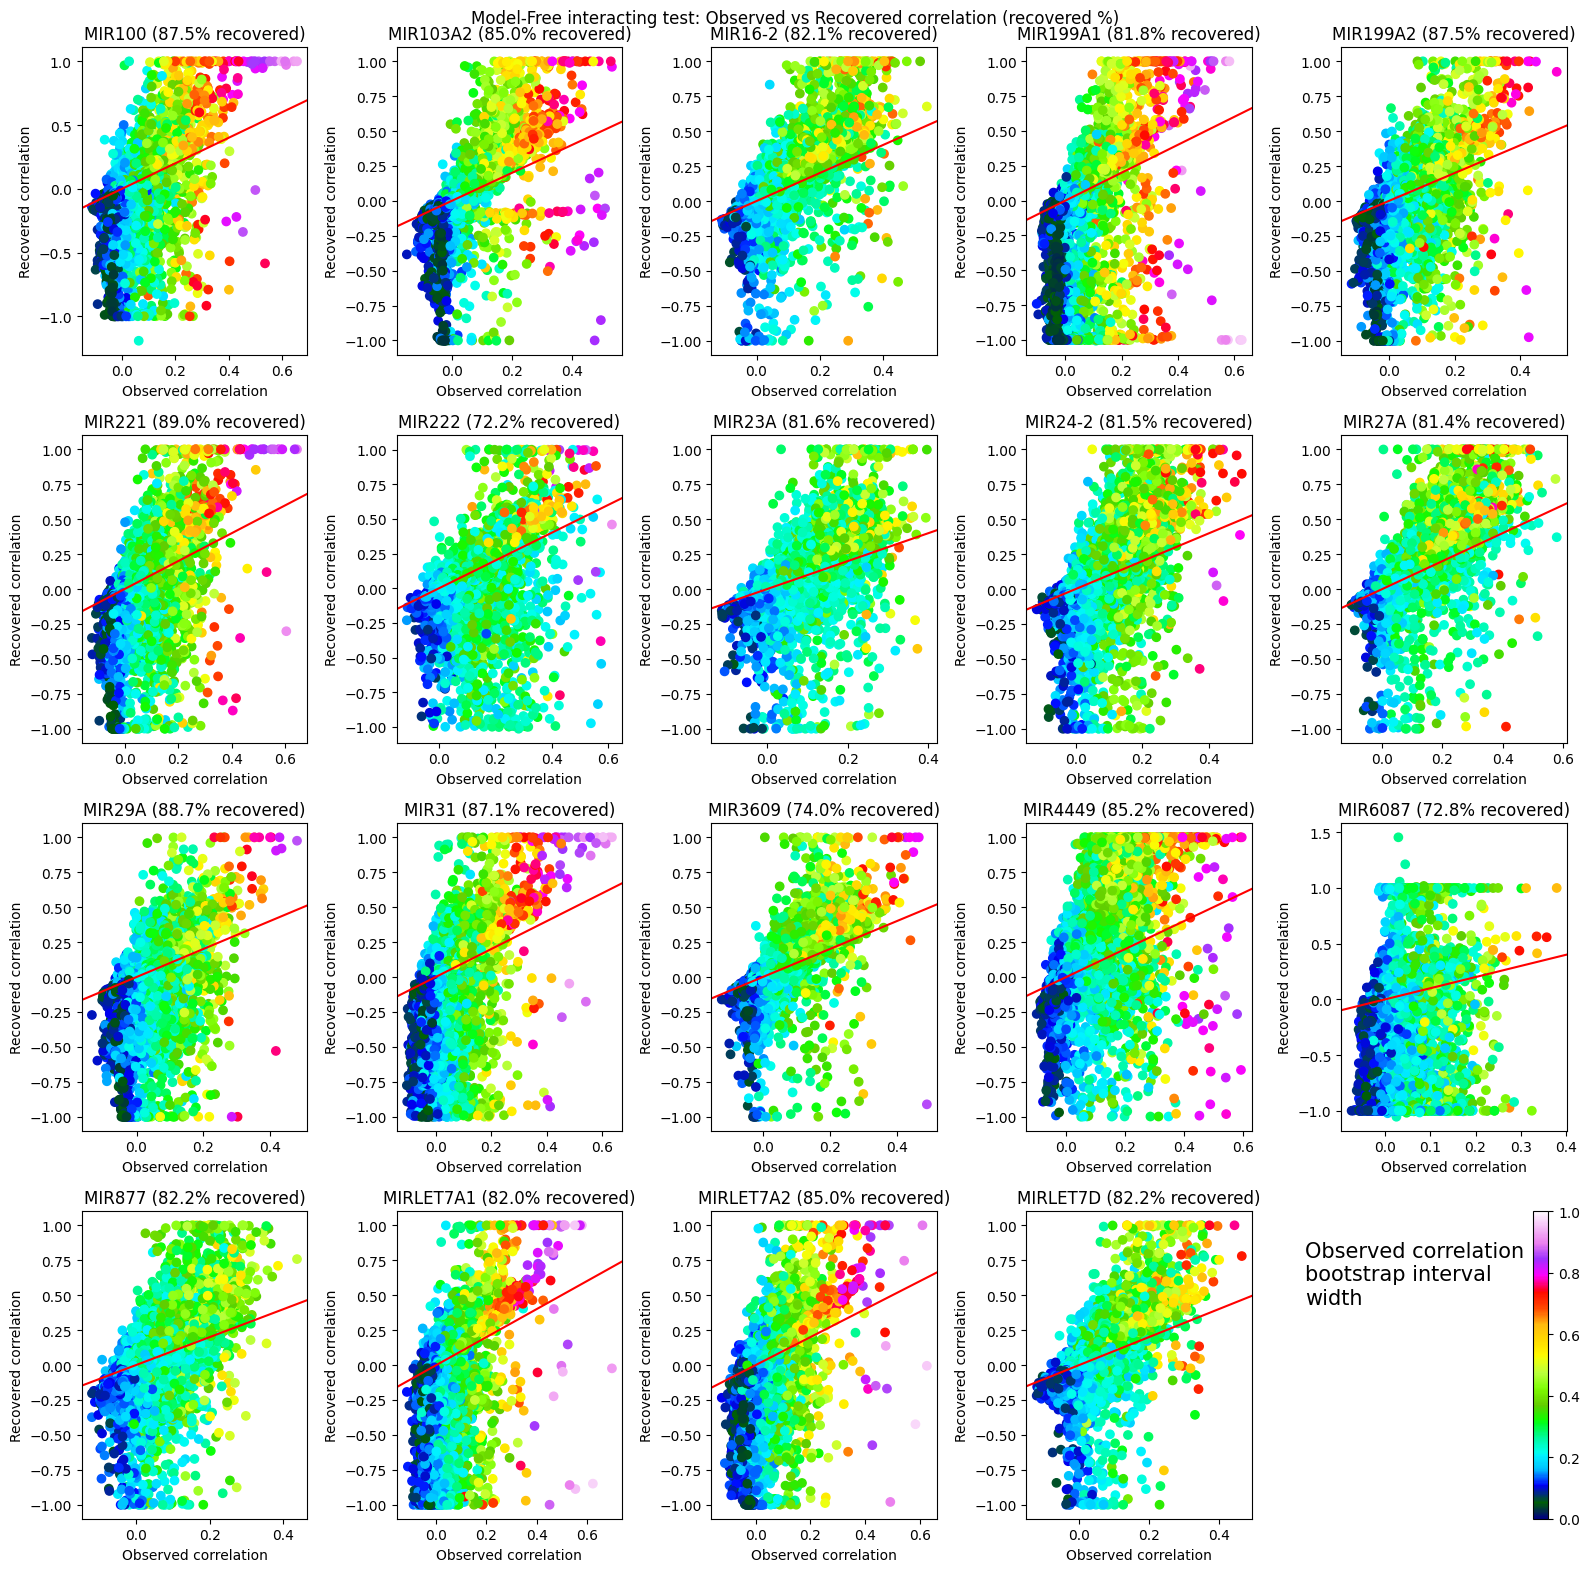

In [149]:
# subplots
m, n = 4, 5
fig, axs = plt.subplots(m, n, figsize=(16, 16))

# for each miRNA
for k, miRNA in enumerate(miRNA_names):
    
    # select subplot
    i = k // n
    j = k % n

    # get data
    observed = correlation_df[f'{miRNA}_rho']
    observed_width = correlation_df[f'{miRNA}_ub'] - correlation_df[f'{miRNA}_lb']
    recovered = interacting_MF_df[f'{miRNA}_d4_c95_correlation']

    # plot
    vmin = 0#np.min(observed_width)
    vmax = 1#np.max(observed_width)
    total = sum(recovered.notna())
    sc = axs[i, j].scatter(
        observed,
        recovered,
        c=observed_width,
        vmin=vmin,
        vmax=vmax,
        cmap="gist_ncar"
    )
    mc = np.mean(observed)
    axs[i, j].axline([mc, mc], [mc+0.1, mc+0.1], color="red")
    axs[i, j].set_title(f"{miRNA} ({round(100 * total / interacting_MF_df.shape[0], 1)}% recovered)")
    axs[i, j].set_xlabel("Observed correlation")
    axs[i, j].set_ylabel("Recovered correlation")
    
# colorbar
fig.colorbar(sc, ax=axs[m - 1, n - 1])
axs[m - 1, n - 1].text(-0.2, 0.7, "Observed correlation \nbootstrap interval \nwidth", fontsize=15)
axs[m - 1, n - 1].axis('off')

# title
plt.suptitle("Model-Free interacting test: Observed vs Recovered correlation (recovered %)")
plt.tight_layout()
plt.show()

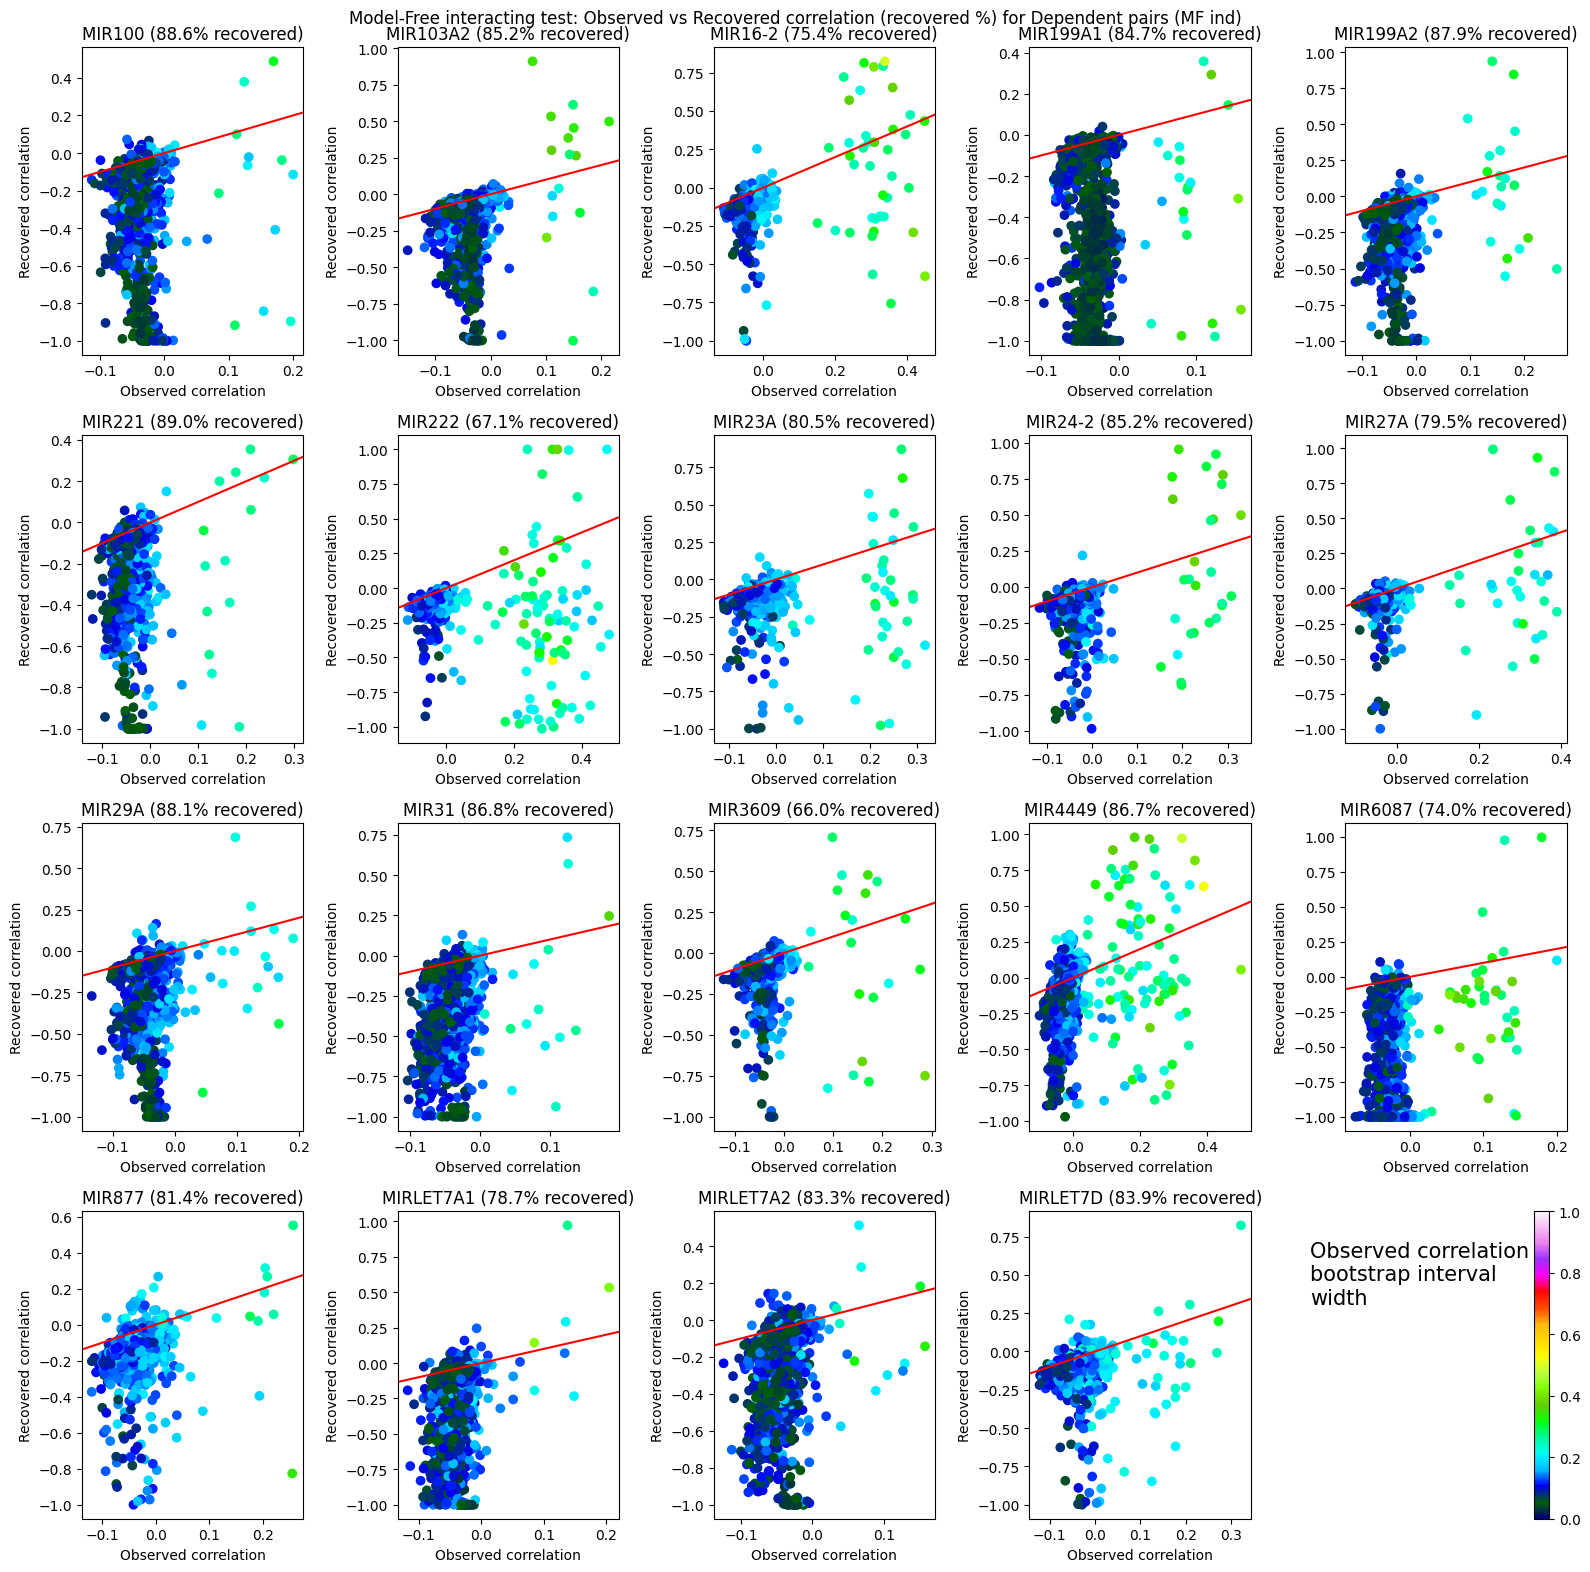

In [148]:
# subplots
m, n = 4, 5
fig, axs = plt.subplots(m, n, figsize=(16, 16))

# for each miRNA
for k, miRNA in enumerate(miRNA_names):
    
    # select subplot
    i = k // n
    j = k % n

    # get data
    status_ind = independent_MF_df[f'{miRNA}_d4_c95_status']
    mask_dep = status_ind == "INFEASIBLE"
    observed = correlation_df[f'{miRNA}_rho'][mask_dep]
    observed_width = correlation_df[f'{miRNA}_ub'][mask_dep] - correlation_df[f'{miRNA}_lb'][mask_dep]
    recovered = interacting_MF_df[f'{miRNA}_d4_c95_correlation'][mask_dep]

    # plot
    vmin = 0#np.min(observed_width)
    vmax = 1#np.max(observed_width)
    total = sum(recovered.notna())
    sc = axs[i, j].scatter(
        observed,
        recovered,
        c=observed_width,
        vmin=vmin,
        vmax=vmax,
        cmap="gist_ncar"
    )
    mc = np.mean(observed)
    axs[i, j].axline([mc, mc], [mc+0.1, mc+0.1], color="red")
    axs[i, j].set_title(f"{miRNA} ({round(100 * total / observed.shape[0], 1)}% recovered)")
    axs[i, j].set_xlabel("Observed correlation")
    axs[i, j].set_ylabel("Recovered correlation")
    
# colorbar
fig.colorbar(sc, ax=axs[m - 1, n - 1])
axs[m - 1, n - 1].text(-0.2, 0.7, "Observed correlation \nbootstrap interval \nwidth", fontsize=15)
axs[m - 1, n - 1].axis('off')

# title
plt.suptitle("Model-Free interacting test: Observed vs Recovered correlation (recovered %) for Dependent pairs (MF ind)")
plt.tight_layout()
plt.show()

# Appendix

### Axis removal code

In [ ]:
# remove excess axes
if k < m * n:
    for l in range(len(miRNA_names), m*n):
        i = l // n
        j = l % n
        fig.delaxes(axs[i, j])